1. Data Analysis:

- Given a dataset on email engagement (including open rates, click-through rates, and conversion rates), perform an exploratory data analysis.
- Identify potential key patterns and insights, using statistical and visualization techniques.

2. Model Development:

- Develop a machine learning model to predict the likelihood of email engagement (open rates or link clicks) based on the features available in the dataset.
- Document the model development process, including data preprocessing, feature engineering, model selection, training, and validation in a Jupyter notebook.

3. Insights and Reporting:

- Analyze the model’s performance and interpret its predictions
- Draft a report summarizing the analysis approach, model development process, key findings, and actionable insights for improving email engagement.

4. Collaboration Simulation:

- Submit the Jupyter notebook and report as a pull request in a simulated version control environment. The pull request description should clearly articulate the changes and their rationale.

Deliverables:

* A Jupyter notebook with detailed analysis and model development code.
* A concise report summarizing methodology, findings, and recommendations.

# Email Campaign
    This notebook is to showcase my work to on your dataset.
    I will go over one by one thing on data
        -  starts from cleaning and making the data correct
        -  More cleaning
        -  EDA
        -  Model Development
        -  Insights and Reporting

In [1]:
import pandas as pd

In [2]:
data = pd.read_pickle('./email_campaigns.pkl')

Get all the series names from data and we will take the series name and add a new column about the series name to make it as feature

In [3]:
series_names = []
clean_data = []
for item in data:
    for key, values in item.items():
        if key not in series_names: # add series name
            series_names.append(key)
        # iterate over values to remove not dict values from a list
        for index in range(len(values)):
            if type(values[index]) is dict:
                values[index]['series_name'] = key
                clean_data.append(values[index])

In [4]:
dataframe = pd.DataFrame(clean_data)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   subject               154 non-null    object
 1   body                  154 non-null    object
 2   opened                154 non-null    object
 3   meeting link clicked  138 non-null    object
 4   responded             154 non-null    object
 5   series_name           154 non-null    object
 6   meeting_link_clicked  16 non-null     object
dtypes: object(7)
memory usage: 8.5+ KB


In [6]:
dataframe.fillna(0, inplace=True) # fill na with False

#### here count no of clicked on both the duplicate name features

In [7]:
dataframe[dataframe['meeting_link_clicked'] != 0]['meeting_link_clicked'].count()

5

In [8]:
dataframe[dataframe['meeting link clicked'] != 0]['meeting link clicked'].count()

41

##### We need to get total 41+5 = 46 Clicked on clean

In [9]:
dataframe['meeting_link_clicked'] = dataframe['meeting_link_clicked'].astype(bool)
dataframe['meeting link clicked'] = dataframe['meeting link clicked'].astype(bool)

As we can see here we have two feature with same name but difference is in connecting the words `meeting link clicked` and `meeting_link_clicked` so lets make it one

In [10]:
def merge_two_column(meeting_link_1, meeting_link_2):
    if meeting_link_1 == True or meeting_link_2 == True:
        return 1
    else:
        return 0

dataframe['clean_meeting_link_clicked'] = dataframe.apply(lambda x: merge_two_column(x['meeting link clicked'], x['meeting_link_clicked']), axis=1)

Now we merged and now lets verify that both of them are merged correctly

In [11]:
dataframe[dataframe['clean_meeting_link_clicked'] == 1]['meeting_link_clicked'].count() # perfectly merged all the meeting_link_clicked

46

Both the columns are merged to clean_meeting_link_clicked and now we can start to find out some insights

In [12]:
dataframe.drop(['meeting_link_clicked', 'meeting link clicked'], axis=1, inplace=True)

Now we have a perfect dataframe for data analysis

    1. Lets see dataset size
    2. Check what % of mails are opened
    3. Check what % of them after opening the mail also clicked meeting link
    4. Check what % of people responded back
    5. Check is there any similarity with series name

In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   subject                     154 non-null    object
 1   body                        154 non-null    object
 2   opened                      154 non-null    object
 3   responded                   154 non-null    object
 4   series_name                 154 non-null    object
 5   clean_meeting_link_clicked  154 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 7.3+ KB


#### We don't have any NA object and dataset is of 154 entries

In [14]:
# convert datatype from object to bool for responded, opened
dataframe['responded'] = dataframe['responded'].astype(int)
dataframe['opened'] = dataframe['opened'].astype(int)

In [15]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   subject                     154 non-null    object
 1   body                        154 non-null    object
 2   opened                      154 non-null    int64 
 3   responded                   154 non-null    int64 
 4   series_name                 154 non-null    object
 5   clean_meeting_link_clicked  154 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 7.3+ KB


In [16]:
# now lets see some statistics and visualization
import matplotlib.pyplot as plt

#### How much % does mail got even opened

In [17]:
import seaborn as sns

In [18]:
# !pip install --upgrade seaborn

<Axes: xlabel='opened', ylabel='count'>

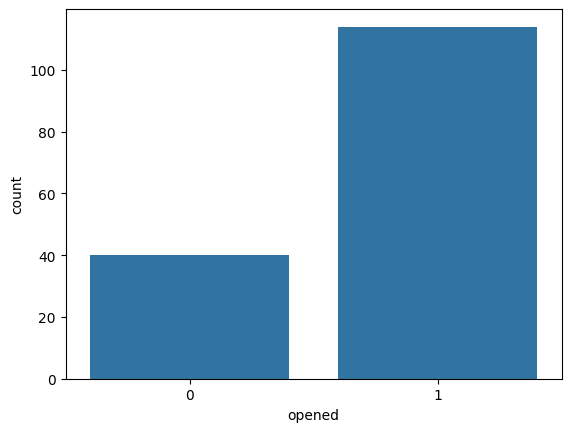

In [19]:
sns.countplot(dataframe, x='opened')

#### Aprox 75% email was opened

<Axes: xlabel='opened', ylabel='count'>

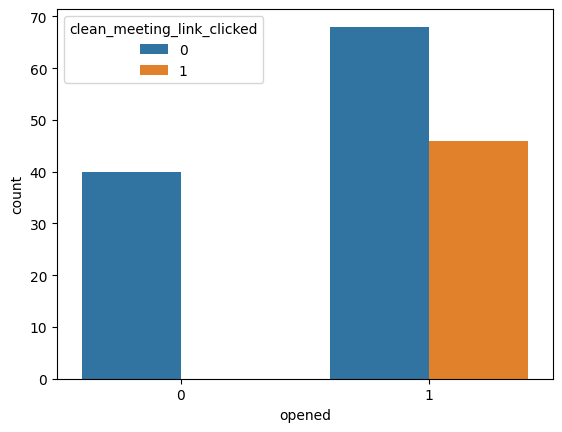

In [20]:
sns.countplot(dataframe, x='opened', hue='clean_meeting_link_clicked')

##### out of 75% there are approx 30% people clicked on meeting

<Axes: xlabel='clean_meeting_link_clicked', ylabel='count'>

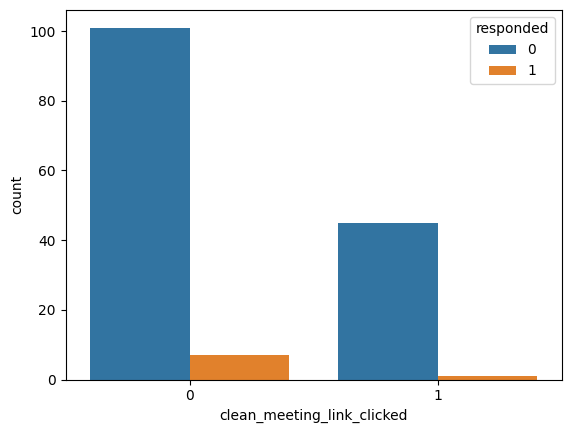

In [21]:
sns.countplot(dataframe, x='clean_meeting_link_clicked', hue='responded')

8 people responeded out of 154 that approximates 5% of the all the emails so we must imporve there

- 4% people not even opened mail that may be they have auto mail as message
- 1% people are those that opened, clicked meeting link and responded


Approx 30% of the mails got clicked that's great if no one responded in start

<ipython-input-22-b977676a39d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe.corr()


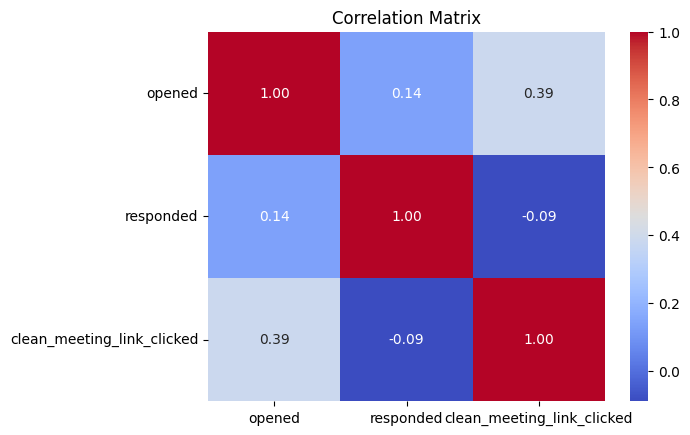

In [22]:
correlation_matrix = dataframe.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

##### there is no perfect correction but .39 relation between opened and meeting link clicked shows that same 40% people click meeting link and negative correlation between meeting and responded shows that they are people who responded but not clicked meeting link

## lets see one more way to data by series

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'example1'),
  Text(1, 0, 'marketingAnalytics0'),
  Text(2, 0, 'HRConsultingSeries'),
  Text(3, 0, 'marketingAnalyticsSeries'),
  Text(4, 0, 'MarketingAnalyticsSeries'),
  Text(5, 0, 'series_legal'),
  Text(6, 0, 'IT_Solutions_Series'),
  Text(7, 0, 'Marketing_Analytics_Series'),
  Text(8, 0, 'series_marketing_analytics'),
  Text(9, 0, 'series1'),
  Text(10, 0, 'HR_Consulting_Series'),
  Text(11, 0, 'financial_advisory_series'),
  Text(12, 0, 'series_IT_Solutions'),
  Text(13, 0, 'Series1_HR_Consulting'),
  Text(14, 0, 'Series_IT_Solutions'),
  Text(15, 0, 'email_series_marketing_analytics'),
  Text(16, 0, 'legal_services0')])

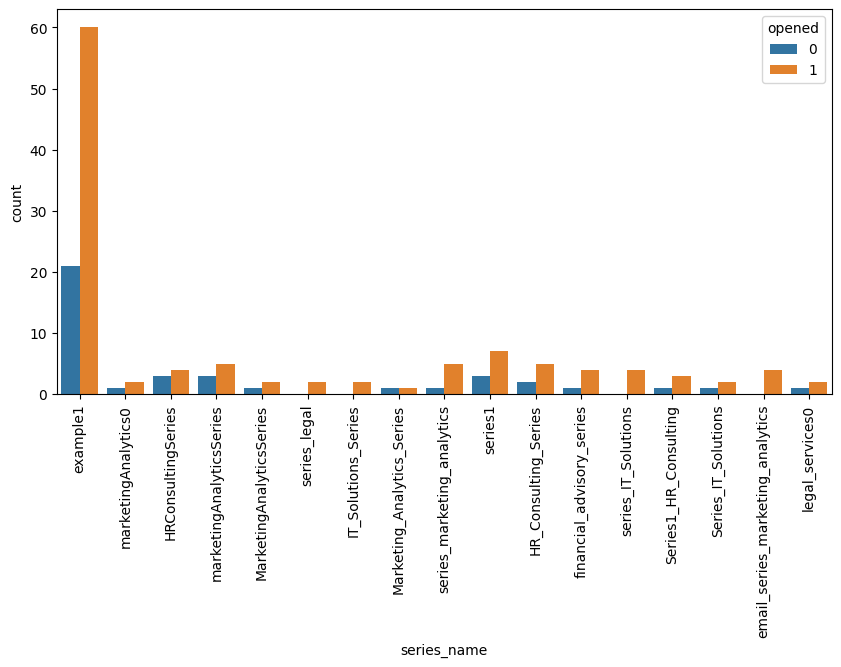

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=dataframe, x='series_name', hue='opened')
plt.xticks(rotation=90)

### Some Observation:
    - from this we can see 100% of IT_solutions_series mails, 100% email_series_marketing_analytics mails and 100% series_legal series mails are opened
    - 1% people are those that opened, clicked meeting link and responded (Perfect person who are interested)

## Model development
    - We will clean the text email data:
        - convert to small letter
        - remove spaces and newlines
        - remove stopwords
        - remove stemmer

In [24]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [25]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
 # to remove no non english words
 # !pip install langid
 import langid

In [27]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = list(set(stopwords.words("english")))
    stop_words.append('hi') # added hi as it will not add any value
    stop_words.append('hey') # added hey as it will not add any value
    stop_words.append('hello') # added hello as it will not add any value
    tokens = [token for token in tokens if token not in stop_words]
    tokens = list(map(lambda x: x.replace('10min', '10minut'), tokens))
    porter = PorterStemmer()
    tokens = [porter.stem(token) for token in tokens]
    filtered_words = [word for word in tokens if langid.classify(word)[0] == 'en'] # to remove non english words
    # Join tokens back into a cleaned text
    cleaned_text = " ".join(tokens)
    return cleaned_text

In [28]:
original_dataframe = dataframe.copy()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   subject                     154 non-null    object
 1   body                        154 non-null    object
 2   opened                      154 non-null    int64 
 3   responded                   154 non-null    int64 
 4   series_name                 154 non-null    object
 5   clean_meeting_link_clicked  154 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 7.3+ KB


In [29]:
# dataframe = original_dataframe.copy()

In [30]:
dataframe['subject_body'] = dataframe['subject'] + dataframe['body']
dataframe['subject_body'] = dataframe['subject_body'].apply(clean_text) # merged subject and body

In [31]:
new_dataframe = dataframe.copy()
dataframe.head()


,subject,body,opened,responded,series_name,clean_meeting_link_clicked,subject_body
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",0,0,example1,0,🚀 propel market roi advanc analyticshey recipi...
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",1,0,example1,0,data superpow 📊 unlock insight ushi recipi nam...
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",0,0,example1,0,turn market data decis 🧐 let explor howgreet r...
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",1,0,example1,1,market success click away let chat analyticshe...
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",0,0,example1,0,🚀 boost brand visibl proven market analyt stra...


In [32]:
# changing feature names by adding original suffix so that if open comes as text on tfid will be different from this one
dataframe.rename(columns={'opened':'original_opened', 'responded':'original_responded'}, inplace=True)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline

corpus1 = dataframe['body'].astype(str)
corpus2 = dataframe['subject'].astype(str)
combined_corpus = corpus1 + ' ' + corpus2

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_vectorizer.fit(combined_corpus)
tfidf_matrix = tfidf_vectorizer.transform(dataframe['subject_body'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
dataframe = pd.concat([dataframe, tfidf_df], axis=1, ignore_index=False)

In [34]:
dataframe.head()

,subject,body,original_opened,original_responded,series_name,clean_meeting_link_clicked,subject_body,10,15,150,...,worried,worries,worth,would,wouldn,yes,yet,you,your,yours
0,🚀 Propel Your Marketing ROI with Advanced Anal...,"Hey [Recipient's Name],\n\nReady to see your m...",0,0,example1,0,🚀 propel market roi advanc analyticshey recipi...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
1,Data is Your Superpower 📊 Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",1,0,example1,0,data superpow 📊 unlock insight ushi recipi nam...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
2,Turn Marketing Data Into Decisions 🧐 Let's Exp...,"Greetings [Recipient's Name],\n\nWe haven't co...",0,0,example1,0,turn market data decis 🧐 let explor howgreet r...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.210718,0.0,0.000000,0.0
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",1,0,example1,1,market success click away let chat analyticshe...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.052787,0.0
4,🚀 Boost Your Brand's Visibility with Proven Ma...,"Hi [Recipient's Name],\n\nIn the digital age, ...",0,0,example1,0,🚀 boost brand visibl proven market analyt stra...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0


In [35]:
dataframe.columns[dataframe.columns.duplicated()].tolist()

[]

Now convert series name through one hot encoding to give each series equal weights

In [36]:
one_hot_encoded = pd.get_dummies(dataframe['series_name'], prefix='series_name')

In [37]:
dataframe = pd.concat([dataframe, one_hot_encoded], axis=1)

In [38]:
final_dataframe = dataframe.drop(['series_name', 'body', 'subject', 'subject_body'], axis=1)

In [39]:
final_dataframe.shape

(154, 1020)

In [40]:
final_dataframe.columns[final_dataframe.columns.duplicated()].tolist()

[]

In [41]:
final_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Columns: 1020 entries, original_opened to series_name_series_marketing_analytics
dtypes: float64(1000), int64(3), uint8(17)
memory usage: 1.2 MB


We have now more features and all the columns are in int, float so lets start model selection

#### Lets select model for our dataset that is very small so its good to start with very basic model to see it works there

In [42]:
from sklearn.model_selection import train_test_split

features = final_dataframe.drop('clean_meeting_link_clicked', axis=1)
labels = final_dataframe['clean_meeting_link_clicked']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [44]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (123, 1019) (123,)
Testing set shape: (31, 1019) (31,)


Data split for train and test so that we can check behaviour of model on unseen data

In [45]:

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_curve, roc_auc_score

In [46]:
def model_details(X_train, y_train, X_test, y_test, model):
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  accuracy = accuracy_score(y_test, predicted)
  print(accuracy)
  print(confusion_matrix(y_test, predicted))
  precision = precision_score(y_test, predicted)
  print(f'precision : {precision}')
  recall = recall_score(y_test, predicted)
  print(f'recall : {recall}')
  y_scores = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_scores)
  roc_auc = roc_auc_score(y_test, y_scores)

  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
  plt.xlabel('False Positive Rate (1 - Specificity)')
  plt.ylabel('True Positive Rate (Sensitivity)')
  plt.title('ROC Curve')
  plt.legend()
  plt.show()

0.6451612903225806
[[17  3]
 [ 8  3]]
precision : 0.5
recall : 0.2727272727272727


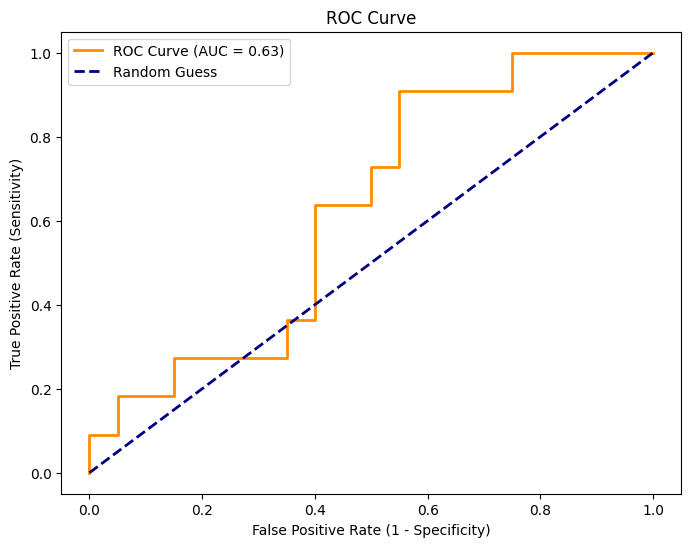

In [47]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_details(X_train, y_train, X_test, y_test, model)

Accuracy is low and its prcision is high buy recall is low and that we want to be more to know click marketing campign to be sucessful

Or model is very simple and its just making all prediction to not clicked and that's shows that we need to increase the model complexcity and our hypothsis went wrong that model will able to predict with less complexcity

0.6774193548387096
[[14  6]
 [ 4  7]]
precision : 0.5384615384615384
recall : 0.6363636363636364


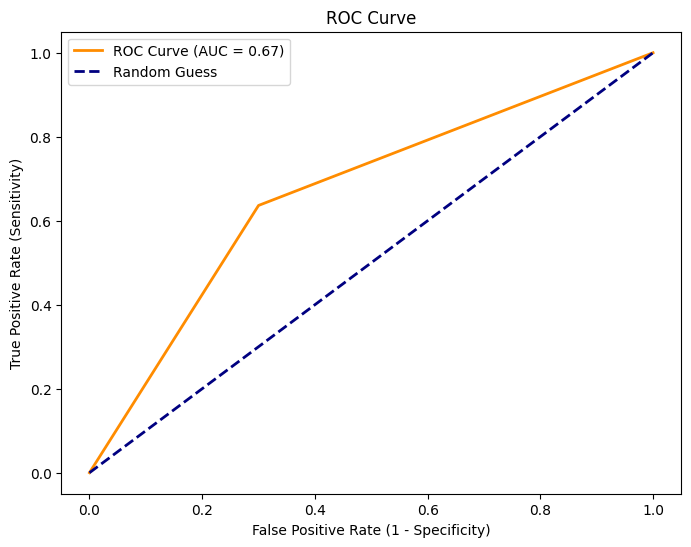

In [48]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_details(X_train, y_train, X_test, y_test, model)

Its okay model and its recall is 60% but precision is 53 that means result is now also 50 50

### SVM are good for high dimension so lets try that

0.6129032258064516
[[16  4]
 [ 8  3]]
precision : 0.42857142857142855
recall : 0.2727272727272727


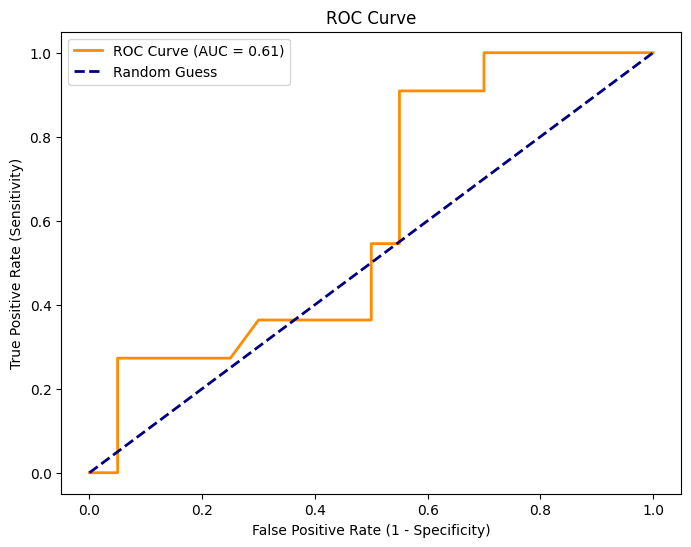

In [49]:
from sklearn.svm import SVC
model = SVC(probability=True, kernel='poly')
model_details(X_train, y_train, X_test, y_test, model)

Our assumption is again wrong and its working as linear model so lets see some more complex model how model behave

0.6774193548387096
[[19  1]
 [ 9  2]]
precision : 0.6666666666666666
recall : 0.18181818181818182


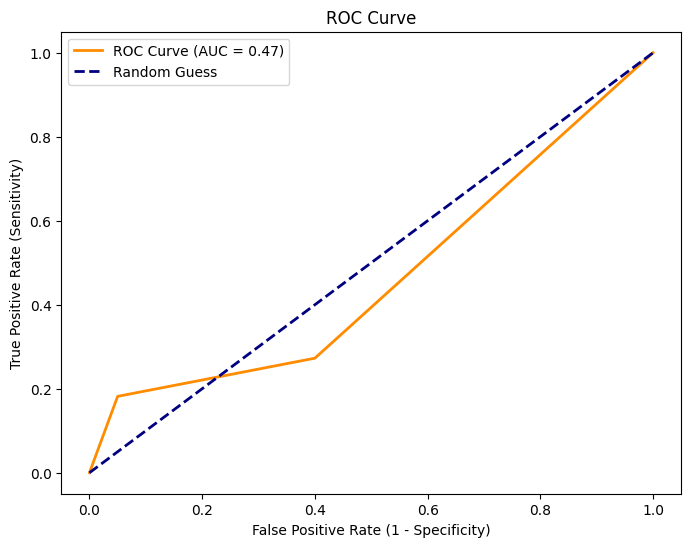

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model_details(X_train, y_train, X_test, y_test, model)

#### Model is not learning to predict click as clicked let try another model xgboost

0.6774193548387096
[[15  5]
 [ 5  6]]
precision : 0.5454545454545454
recall : 0.5454545454545454


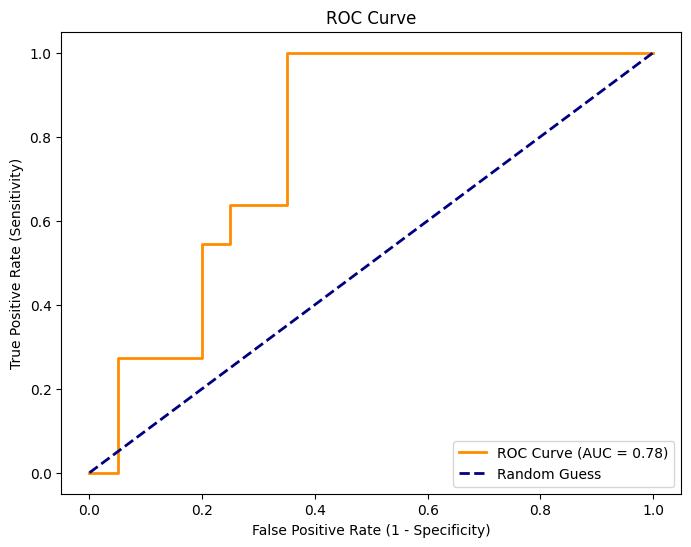

In [51]:
import xgboost as xgb
model = xgb.XGBClassifier()
model_details(X_train, y_train, X_test, y_test, model)


Model doesnot performed well on this data

and there are many other improvement that i think will improve model accuracy
- dropping duplicate 10min	10minut

Analyze the model’s performance and interpret its predictions
Draft a report summarizing the analysis approach, model development process, key findings, and actionable insights for improving email engagement.